In [55]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [56]:
#load the dataset
df = pd.read_csv("Mall_Customers.csv")

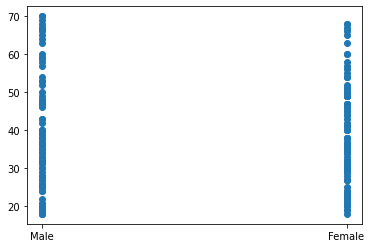

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.Gender,df.Age)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

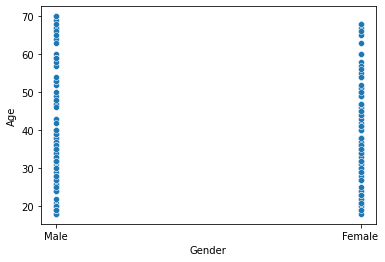

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = df.Gender,y = df.Age)

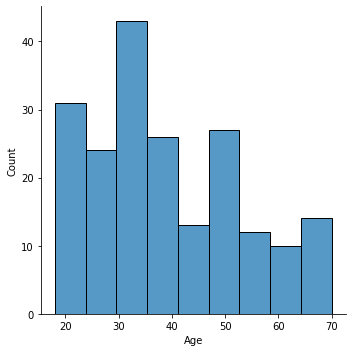

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df["Age"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

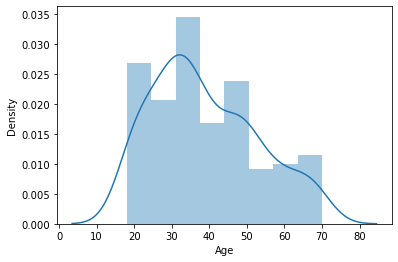

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

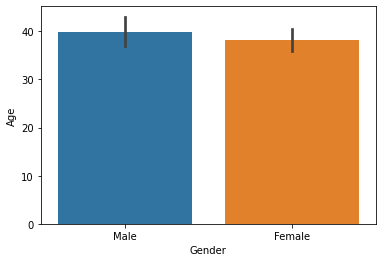

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(df["Gender"],df["Age"])

<AxesSubplot:xlabel='Age'>

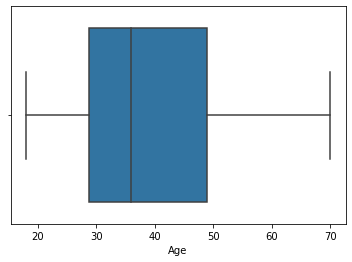

In [17]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

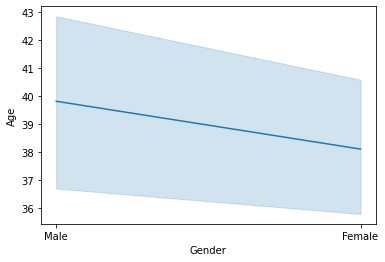

In [20]:
sns.lineplot(df["Gender"],df["Age"])

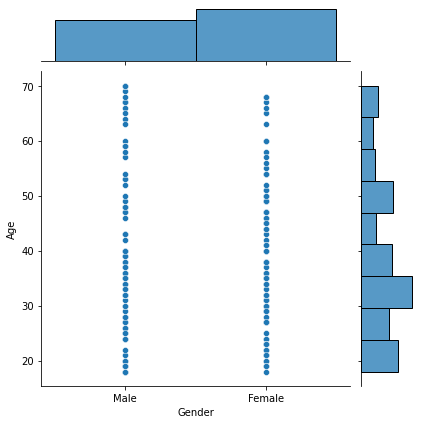

In [21]:
sns.jointplot(df["Gender"],df["Age"])

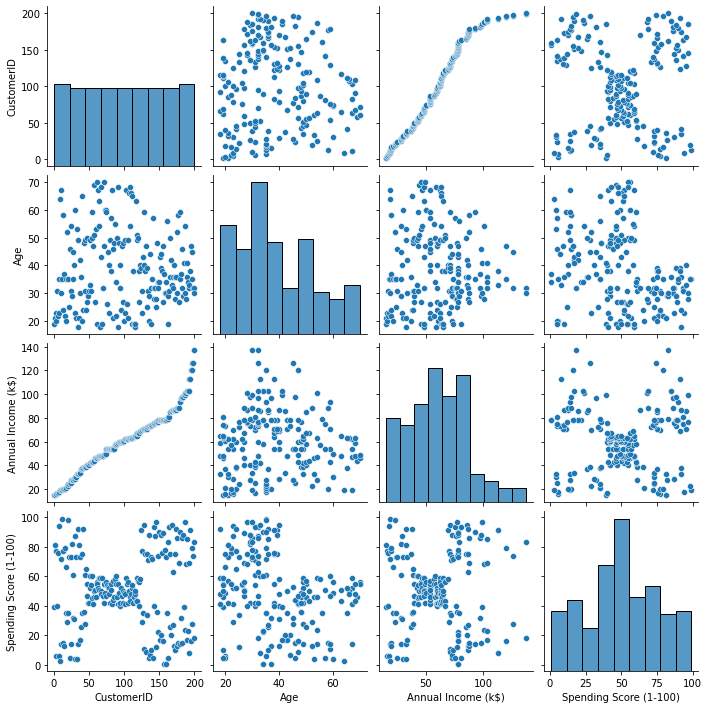

In [22]:
sns.pairplot(df)

In [23]:
# descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
# checking missing values
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [25]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [26]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
qnt = df .quantile(q = (0.25,0.75))

In [28]:
qnt

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [29]:
iqr = qnt.loc[0.75] - qnt.loc[0.25]

In [30]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [31]:
lower = qnt.loc [0.25] - 1.5*iqr
lower

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [32]:
upper =qnt.loc[0.75] + 1.5*iqr
upper

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)
df["Age"].replace({"10":1,"7":0},inplace = True)


In [35]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [38]:
df_main = pd.get_dummies(df,columns =["Age"])

In [39]:
df_main

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,120,79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,197,0,126,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,198,1,126,74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,199,1,137,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [15]:
df_new = df.iloc[:,1:]

In [8]:
df["Age"] = np.where(df["Age"] == "35","ok",df["Age"])


In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
X = df["Gender"]
Y = df["Age"]

In [38]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.iloc[:,0:80]
x

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,ok,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
y = df.iloc[:,2:]
y

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,ok,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [58]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 5), (40, 5), (160, 3), (40, 3))

In [69]:
x_test

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
18,19,Male,52,23,29
170,171,Male,40,87,13
107,108,Male,54,63,46
98,99,Male,48,61,42
177,178,Male,27,88,69
182,183,Male,46,98,15
5,6,Female,22,17,76
146,147,Male,48,77,36
12,13,Female,58,20,15
152,153,Female,44,78,20


In [70]:
x_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
134,135,Male,20,73,5
66,67,Female,43,48,50
26,27,Female,45,28,32
113,114,Male,19,64,46
168,169,Female,36,87,27
...,...,...,...,...,...
67,68,Female,68,48,48
192,193,Male,33,113,8
117,118,Female,49,65,59
47,48,Female,27,40,47


In [73]:
y_test

,Age,Annual Income (k$),Spending Score (1-100)
18,52,23,29
170,40,87,13
107,54,63,46
98,48,61,42
177,27,88,69
182,46,98,15
5,22,17,76
146,48,77,36
12,58,20,15
152,44,78,20


In [74]:
y_train

,Age,Annual Income (k$),Spending Score (1-100)
134,20,73,5
66,43,48,50
26,45,28,32
113,19,64,46
168,36,87,27
...,...,...,...
67,68,48,48
192,33,113,8
117,49,65,59
47,27,40,47


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [1]:
# importing metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score